# WeGo Public Transit
[WeGo Public Transit](https://www.wegotransit.com/) is a public transit system serving the Greater Nashville and Davidson County area. WeGo provides local and regional bus routes, the WeGo Star train service connecting Lebanon to downtown Nashville, along with several other transit services.

In this project, you'll be analyzing the bus spacing to look for patterns and try to identify correlations to controllable or external factors. Specifically, you'll be using a dataset containing information on the headway, or amount of time between vehicle arrivals at a stop. This dataset contains a column HDWY_DEV, which shows the headway deviation. This variable will be negative when bunching has occurred (shorter headway than scheduled) and will be positive for gapping (longer headway than scheduled). Note that you can calculate headway deviation percentage as HDWY_DEV/SCHEDULED_HDWY.

Goals of this project:
1. How much impact does being late or too spaced out at the first stop have downstream?
2. What is the impact of the layover at the start of the trip (the difference between the first top arrival and departure time)? Does more layover lead to more stable headways (lower values for % headway deviation)?
3. How closely does lateness (ADHERENCE) correlate to headway?
4. What is the relationship between distance or time travelled since the start of a given trip and the headway deviation? Does headway become less stable the further along the route the bus has travelled?
5. How much of a factor does the driver have on headway and on-time performance? The driver is indicated by the OPERATOR variable.
6. How does direction of travel, route, or location affect the headway and on-time performance?
7. How does time of day or day of week affect headway and on-time performance? Can you detect an impact of school schedule on headway deviation (for certain routes and at certain times of day)?
8. Does weather have any effect on headway or on-time performance? To help answer this question, the file bna_weather.csv contains historical weather data recorded at Nashville International Airport. 

- **ADHERENCE:** 
  - Difference between actual departure time and scheduled time. 
  - Negative indicates departure time after scheduled time, and positive indicates departure time before scheduled time.

- **SCHEDULED_HDWY:** 
  - Scheduled headway in minutes for the given timepoint crossing record. 
  - Headway is the difference between the `SCHEDULED_TIME` and the previous scheduled time for that stop.

- **ACTUAL_HDWY:** 
  - Actual headway. 
  - *Note:* Does not exclude overloads, as we want to know about them for actual headway performance.

- **HDWY_DEV:** 
  - Calculates headway deviation in minutes as the difference between actual and scheduled headway. 
  - Negative values indicate a shorter headway than scheduled (i.e. bunching) and positive values indicate a longer headway than scheduled (i.e. gapping).

In [1]:
#(some sort of grouping or calculations across rows for #1)

In [2]:
#Methodology....
##1add rows to the df that include first_stop hdwy(A) and downstream_hdwy(B) in a way that they can interact with 
##each other...
##2add rows that divide 1st stop headway by each instance of downstream headway (B/A)
##3subset to a single trip_id
##4Expand to 3 to four trips.
###How best to display data? Use mariels adherence plot as inspiration...
##5Expand to an entire ROUTE_ABBR or Day.  

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import islice, cycle

In [4]:
#how to decode?
#check how to correctly specify pathway...
#Ask michael some clarifying q's on below.  Should've just run on pd.read_excel

df_hw.to_csv('wego_data_1.csv')

In [5]:
pd.set_option('display.max_columns', None)

In [6]:
#Route 7 is three out and three back
#Route 22 is four out and three back

In [7]:
df_hw = pd.read_csv('wego_data_1.csv', index_col=False)
df_hw.drop(columns=['Unnamed: 0'], inplace=True, axis=1)
df_hw['PERC_HDWY'] = (df_hw['HDWY_DEV']/df_hw['SCHEDULED_HDWY'])
df_hw.loc[30:100]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY
30,120230801,1,99457920,2023-08-01,22,2200,1040,345112,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,09:10:00,09:05:34,09:05:34,4.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,280,0.000000,NaN
31,120230801,1,99457921,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,09:15:00,09:05:34,09:16:27,-1.450000,15.0,14.600000,-0.400000,0,0,1,0,0.0,0,281,10.883333,-0.026667
32,120230801,1,99457922,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,09:26:00,09:24:44,09:24:44,1.266666,16.0,10.483333,-5.516667,1,0,0,0,0.0,0,296,0.000000,-0.344792
33,120230801,1,99457923,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,09:36:00,09:33:50,09:33:50,2.166666,NaN,NaN,NaN,0,0,1,0,NaN,0,307,0.000000,NaN
34,120230801,1,99457924,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,09:40:00,09:33:50,09:42:42,-2.700000,55.0,55.100000,0.100000,0,0,1,0,0.0,0,308,8.866666,0.001818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,120230801,1,99457986,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,20:36:00,20:40:19,20:40:19,-4.316666,NaN,NaN,NaN,0,0,1,0,NaN,0,910,0.000000,NaN
97,120230801,1,99457987,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,20:43:00,20:40:19,20:42:03,0.950000,68.0,60.533333,-7.466667,0,0,1,0,0.0,0,911,1.733333,-0.109804
98,120230801,1,99457988,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,20:52:00,20:56:38,20:56:38,-4.633333,33.0,35.750000,2.750000,0,0,1,0,0.0,0,927,0.000000,0.083333
99,120230801,1,99457989,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,21:08:00,21:05:04,21:05:04,2.933333,NaN,NaN,NaN,0,0,1,0,NaN,0,943,0.000000,NaN


In [8]:
df_hw.dtypes

CALENDAR_ID                    int64
SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                     int64
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
I

In [9]:
df_hw.loc[30:100]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY
30,120230801,1,99457920,2023-08-01,22,2200,1040,345112,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,09:10:00,09:05:34,09:05:34,4.433333,NaN,NaN,NaN,0,0,1,0,NaN,0,280,0.000000,NaN
31,120230801,1,99457921,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,09:15:00,09:05:34,09:16:27,-1.450000,15.0,14.600000,-0.400000,0,0,1,0,0.0,0,281,10.883333,-0.026667
32,120230801,1,99457922,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,09:26:00,09:24:44,09:24:44,1.266666,16.0,10.483333,-5.516667,1,0,0,0,0.0,0,296,0.000000,-0.344792
33,120230801,1,99457923,2023-08-01,22,2200,1040,345113,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,09:36:00,09:33:50,09:33:50,2.166666,NaN,NaN,NaN,0,0,1,0,NaN,0,307,0.000000,NaN
34,120230801,1,99457924,2023-08-01,22,2200,1040,345114,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,09:40:00,09:33:50,09:42:42,-2.700000,55.0,55.100000,0.100000,0,0,1,0,0.0,0,308,8.866666,0.001818
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,120230801,1,99457986,2023-08-01,22,2200,2689,345132,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,20:36:00,20:40:19,20:40:19,-4.316666,NaN,NaN,NaN,0,0,1,0,NaN,0,910,0.000000,NaN
97,120230801,1,99457987,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,20:43:00,20:40:19,20:42:03,0.950000,68.0,60.533333,-7.466667,0,0,1,0,0.0,0,911,1.733333,-0.109804
98,120230801,1,99457988,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,20:52:00,20:56:38,20:56:38,-4.633333,33.0,35.750000,2.750000,0,0,1,0,0.0,0,927,0.000000,0.083333
99,120230801,1,99457989,2023-08-01,22,2200,2689,345133,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,21:08:00,21:05:04,21:05:04,2.933333,NaN,NaN,NaN,0,0,1,0,NaN,0,943,0.000000,NaN


In [10]:
df_corr1 = df_hw['ADHERENCE'].corr(df_hw['ACTUAL_HDWY'])
df_corr1

-0.07471899346736784

In [11]:
#review basic data types.
df_hw.dtypes

CALENDAR_ID                    int64
SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                     int64
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
I

In [12]:
#If route ABBR are just the abbreviations to the routes, there are only 8?
df_hw.value_counts('ROUTE_ABBR')

ROUTE_ABBR
55    61944
56    60020
52    51819
3     47162
50    43291
23    42108
22    25958
7     18026
dtype: int64

In [13]:
#Headway deviation = amount of time between vehicle arrivals at a stop.  This variable will be negative when bunching 
#has occurred (shorter headway than scheduled) and will be positive for gapping (longer headway than scheduled).
df_hw.value_counts('HDWY_DEV')

HDWY_DEV
 0.000000      760
 0.016666      699
-0.100000      660
-0.016667      640
-0.116667      619
              ... 
 32.483333       1
 32.533333       1
 32.550000       1
 32.566666       1
 565.433333      1
Length: 4217, dtype: int64

In [14]:
df_hw.value_counts('BLOCK_ABBR')

BLOCK_ABBR
300     8894
2312    8532
2310    8233
5003    8086
5004    8048
        ... 
6401      72
8405      72
8604      72
9302      72
9975      72
Length: 102, dtype: int64

In [15]:
pd.set_option('display.max_rows', 500)

In [16]:
#Q's
#What is BLOCK_ABBR?
#IS ROUTE_ABBR actually the route? or something else.  Did MTA run 50 runs of 7 on 8-1-2023?
#Destination	
#HILLSBORO TRANSIT CENTER  21ST AVE S & CHILDRENS WAY   NB CENTRAL 5TH AVE - BAY 9   CENTRAL 4TH AVE - BAY 20
#DOWNTOWN	5:46 AM	             5:54 AM	                    6:10 AM	-
#Where are bus times? are they included here?
#

In [17]:
#NaN is if there's no HDWY_DEV
df7 = df_hw[(df_hw['ROUTE_ABBR'] == 7) & (df_hw['DATE'] == '2023-08-01')]
df7

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY
2123,120230801,1,99460956,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,14:31:00,14:31:27,14:31:27,-0.450000,15.0,1.150000,-13.850000,0,0,1,0,0.0,0,2,0.000000,-0.923333
2124,120230801,1,99460957,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,14:41:00,14:46:54,14:46:54,-5.900000,15.0,5.950000,-9.050000,0,0,1,0,0.0,0,11,0.000000,-0.603333
2125,120230801,1,99460958,2023-08-01,7,4101,907,346716,0,TO DOWNTOWN,MCC5_12,2.0,2,36.167091,-86.781923,15:00:00,15:05:41,15:05:41,-5.683333,NaN,NaN,NaN,0,0,1,0,NaN,0,23,0.000000,NaN
6134,120230801,1,99465615,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,05:15:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,2,NaN,NaN
6135,120230801,1,99465616,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,21BK,4.0,0,36.138881,-86.800622,05:28:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,13,NaN,NaN
6136,120230801,1,99465617,2023-08-01,7,700,3144,348421,0,FROM DOWNTOWN,HBHS,5.0,2,36.107575,-86.812719,05:40:00,05:09:44,05:09:44,30.266666,NaN,NaN,NaN,0,0,1,0,NaN,0,27,0.000000,NaN
6137,120230801,1,99465618,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,HBHS,5.0,1,36.107575,-86.812719,05:46:00,05:09:44,05:11:45,34.250000,NaN,NaN,NaN,1,0,0,0,0.0,0,28,2.016666,NaN
6138,120230801,1,99465619,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,21BK,4.0,0,36.138372,-86.800622,05:54:00,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0.0,0,37,NaN,NaN
6139,120230801,1,99465620,2023-08-01,7,700,3144,348422,0,TO DOWNTOWN,MCC5_9,3.0,2,36.167091,-86.781923,06:10:00,05:20:00,05:20:00,50.000000,NaN,NaN,NaN,1,0,0,0,NaN,0,49,0.000000,NaN
6140,120230801,1,99465621,2023-08-01,7,700,3144,348423,0,FROM DOWNTOWN,MCC5_9,3.0,1,36.167091,-86.781923,06:15:00,05:20:00,05:27:29,47.516666,10.0,NaN,NaN,1,0,0,0,0.0,0,50,7.483333,NaN


In [18]:
#For route 7 on 8-1-2023, there were 211 HDWY_DEV recorded
#211/330 = 64% of the time there was a deviance issue 
#max=20.77
#min=-19.167
df7.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY
count,330.0,330.0,3.300000e+02,330.0,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,330.000000,309.000000,216.000000,211.000000,211.000000,330.000000,330.000000,330.000000,330.000000,220.000000,330.000000,330.000000,309.000000,211.000000
mean,120230801.0,1.0,9.946574e+07,7.0,733.509091,1819.906061,348550.481818,0.009091,3.996970,0.996970,36.137767,-86.798421,5.059008,20.675926,21.161532,0.303712,0.130303,0.172727,0.633333,0.009091,0.009091,0.027273,235.472727,3.883603,0.014663
std,0.0,0.0,4.690609e+02,0.0,323.042341,957.800438,196.701032,0.095056,0.823288,0.819587,0.024342,0.012688,23.904244,7.749963,10.418815,6.909897,0.337148,0.378585,0.482626,0.095056,0.095128,0.163124,159.077357,6.804444,0.375407
min,120230801.0,1.0,9.946096e+07,7.0,700.000000,341.000000,346716.000000,0.000000,2.000000,0.000000,36.107575,-86.812719,-22.783333,10.000000,0.833333,-19.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,-0.958333
25%,120230801.0,1.0,9.946570e+07,7.0,701.000000,723.000000,348488.000000,0.000000,3.000000,0.000000,36.107575,-86.812719,-4.316666,15.000000,14.450000,-2.658333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,97.000000,0.000000,-0.118056
50%,120230801.0,1.0,9.946578e+07,7.0,703.000000,2164.000000,348615.500000,0.000000,4.000000,1.000000,36.138881,-86.800622,-1.716666,20.000000,19.900000,0.016666,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,220.000000,0.000000,0.000833
75%,120230801.0,1.0,9.946587e+07,7.0,704.000000,2500.000000,348643.000000,0.000000,5.000000,2.000000,36.167091,-86.781923,-0.116666,20.000000,27.766666,2.358333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,356.500000,6.750000,0.105983
max,120230801.0,1.0,9.946595e+07,7.0,4101.000000,3144.000000,348670.000000,1.000000,5.000000,2.000000,36.167091,-86.781923,88.383333,60.000000,71.483333,20.766666,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,625.000000,37.883333,1.384444


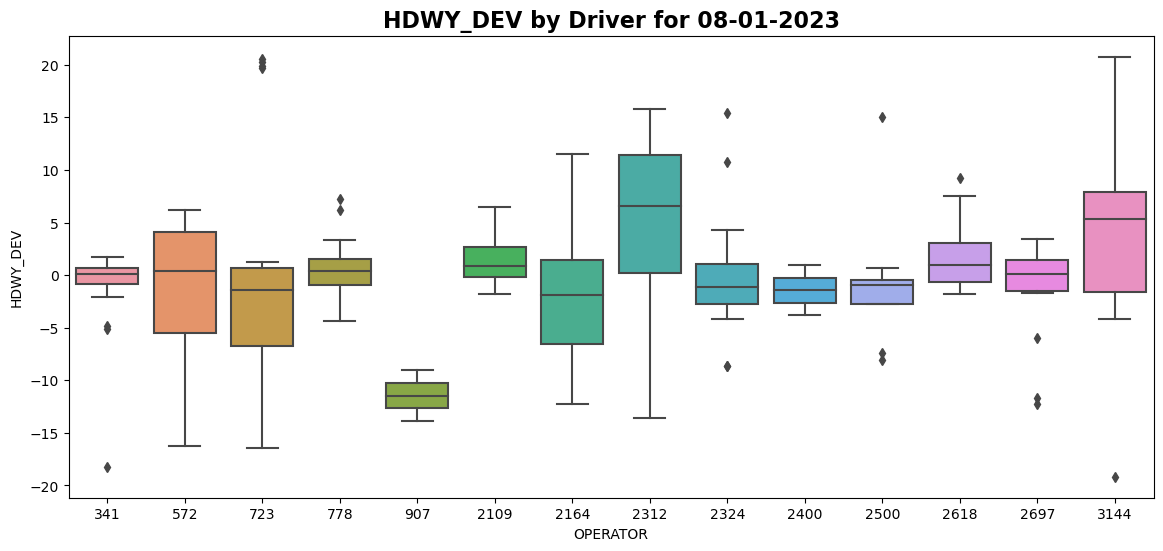

In [19]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.boxplot(data = df7, x = 'OPERATOR', y = 'HDWY_DEV');
plt.title('HDWY_DEV by Driver for 08-01-2023', fontsize = fontsize, fontweight = 'bold');

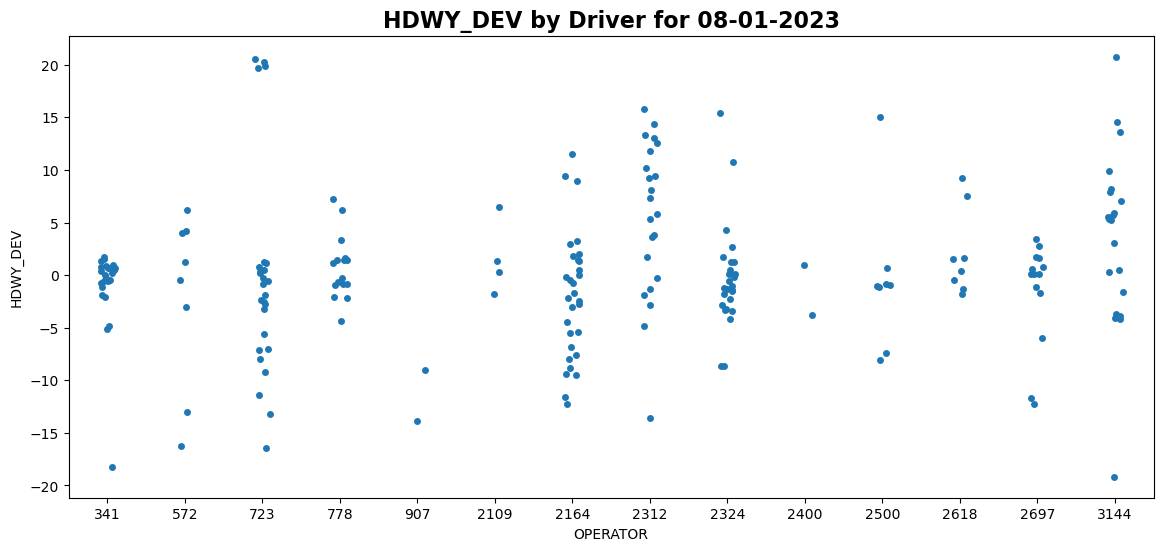

In [20]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.stripplot(data = df7, x = 'OPERATOR', y = 'HDWY_DEV');
plt.title('HDWY_DEV by Driver for 08-01-2023', fontsize = fontsize, fontweight = 'bold');

In [21]:
#Comparisons of drivers on 08-01-2023
#907 30 entries
#314 35 entries
#3144 39 entries
#778 24 entires


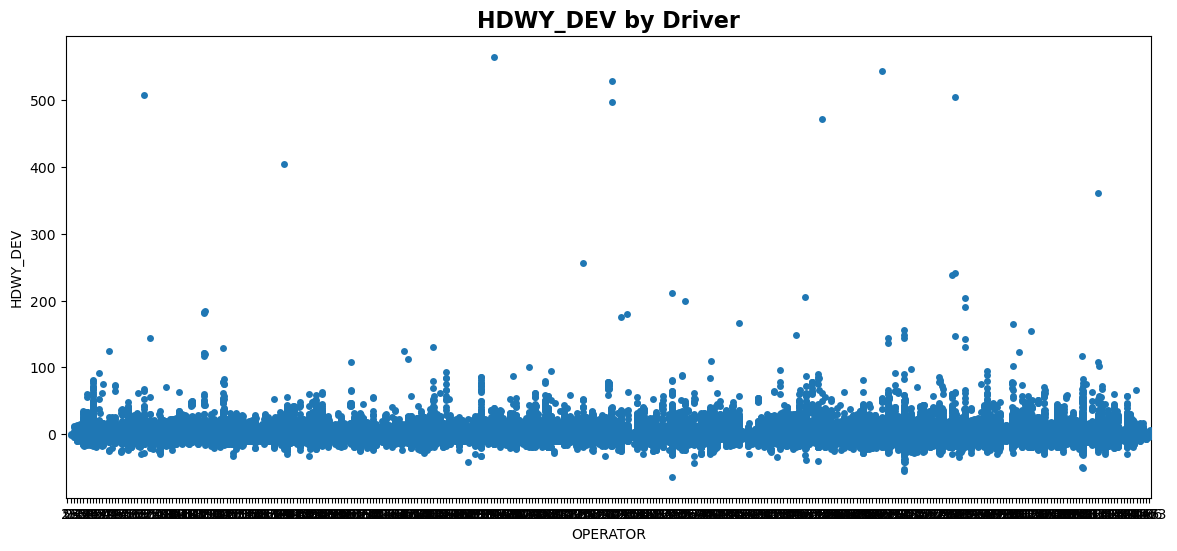

In [22]:
fontsize = 16

plt.subplots(figsize = (14, 6))
sns.stripplot(data = df_hw, x = 'OPERATOR', y = 'HDWY_DEV');
plt.title('HDWY_DEV by Driver', fontsize = fontsize, fontweight = 'bold');

In [23]:
df_hw.dtypes

CALENDAR_ID                    int64
SERVICE_ABBR                   int64
ADHERENCE_ID                   int64
DATE                          object
ROUTE_ABBR                     int64
BLOCK_ABBR                     int64
OPERATOR                       int64
TRIP_ID                        int64
OVERLOAD_ID                    int64
ROUTE_DIRECTION_NAME          object
TIME_POINT_ABBR               object
ROUTE_STOP_SEQUENCE          float64
TRIP_EDGE                      int64
LATITUDE                     float64
LONGITUDE                    float64
SCHEDULED_TIME                object
ACTUAL_ARRIVAL_TIME           object
ACTUAL_DEPARTURE_TIME         object
ADHERENCE                    float64
SCHEDULED_HDWY               float64
ACTUAL_HDWY                  float64
HDWY_DEV                     float64
ADJUSTED_EARLY_COUNT           int64
ADJUSTED_LATE_COUNT            int64
ADJUSTED_ONTIME_COUNT          int64
STOP_CANCELLED                 int64
PREV_SCHED_STOP_CANCELLED    float64
I

In [24]:
df_q1 = df_hw[['ROUTE_ABBR','TRIP_ID','ADHERENCE','SCHEDULED_TIME','ACTUAL_ARRIVAL_TIME','TRIP_EDGE','ACTUAL_HDWY','SCHEDULED_HDWY','PERC_HDWY' ]]
df_q1.loc[897:903]

,ROUTE_ABBR,TRIP_ID,ADHERENCE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,TRIP_EDGE,ACTUAL_HDWY,SCHEDULED_HDWY,PERC_HDWY
897,23,345577,-1.050000,07:03:00,06:49:55,1,9.466666,12.0,-0.211111
898,23,345577,-0.450000,07:09:00,07:09:27,0,9.200000,12.0,-0.233333
899,23,345577,-0.533333,07:16:00,07:16:32,0,10.133333,12.0,-0.155556
900,23,345577,-1.716666,07:24:00,07:25:43,0,NaN,NaN,NaN
901,23,345577,-1.450000,07:39:00,07:25:43,0,21.966666,24.0,-0.084722
902,23,345577,-5.666666,07:48:00,07:53:40,0,25.966666,24.0,0.081944
903,23,345577,-3.533333,07:58:00,08:01:32,2,NaN,NaN,NaN


In [25]:
#df['new_col'] = df.apply(lambda row: row['col2'] if row['col1'] == 1 else 0, axis=1)
df_q1['FIRST_STOP_HDWY'] = df_q1.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] == 1 else 0, axis=1)
df_q1['DOWNSTREAM_HDWY'] = df_q1.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] in (0, 2) else 0, axis=1)
df_q1[898:903]

C:\Users\micha\AppData\Local\Temp\ipykernel_15272\2144731798.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1['FIRST_STOP_HDWY'] = df_q1.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] == 1 else 0, axis=1)
C:\Users\micha\AppData\Local\Temp\ipykernel_15272\2144731798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_q1['DOWNSTREAM_HDWY'] = df_q1.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] in (0, 2) else 0, axis=1)


,ROUTE_ABBR,TRIP_ID,ADHERENCE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,TRIP_EDGE,ACTUAL_HDWY,SCHEDULED_HDWY,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY
898,23,345577,-0.450000,07:09:00,07:09:27,0,9.200000,12.0,-0.233333,0.0,9.200000
899,23,345577,-0.533333,07:16:00,07:16:32,0,10.133333,12.0,-0.155556,0.0,10.133333
900,23,345577,-1.716666,07:24:00,07:25:43,0,NaN,NaN,NaN,0.0,NaN
901,23,345577,-1.450000,07:39:00,07:25:43,0,21.966666,24.0,-0.084722,0.0,21.966666
902,23,345577,-5.666666,07:48:00,07:53:40,0,25.966666,24.0,0.081944,0.0,25.966666


In [26]:
df_hw['FIRST_STOP_HDWY'] = df_hw.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] == 1 else 0, axis=1)
df_hw['DOWNSTREAM_HDWY'] = df_hw.apply(lambda row: row['ACTUAL_HDWY'] if row['TRIP_EDGE'] in (0, 2) else 0, axis=1)
df_hw.loc[50:53]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY
50,120230801,1,99457940,2023-08-01,22,2200,2374,345119,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,12:30:00,12:26:05,12:26:05,3.916666,NaN,NaN,NaN,0,0,1,0,NaN,1,475,0.000000,NaN,0.0,NaN
51,120230801,1,99457941,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,12:40:00,12:26:05,12:42:07,-2.116666,12.0,14.800000,2.800000,0,0,1,0,0.0,0,476,16.033333,0.233333,14.8,0.000000
52,120230801,1,99457942,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,12:52:00,12:53:34,12:53:34,-1.566666,12.0,14.416666,2.416666,0,0,1,0,0.0,0,491,0.000000,0.201389,0.0,14.416666
53,120230801,1,99457943,2023-08-01,22,2200,2374,345120,0,FROM DOWNTOWN,CLFF,9.0,0,36.192856,-86.828554,12:56:00,NaN,NaN,NaN,50.0,NaN,NaN,0,0,0,0,0.0,0,497,NaN,NaN,0.0,NaN


In [27]:
df_hw['FIRST_STOP_HDWY'] = df_hw['FIRST_STOP_HDWY'].replace(np.nan, 0)
df_hw['FS_HDWY'] = df_hw.groupby(['TRIP_ID','CALENDAR_ID'])['FIRST_STOP_HDWY'].transform(sum)
df_t1 = df_hw[['TRIP_ID', 'PERC_HDWY', 'FIRST_STOP_HDWY','FS_HDWY','DOWNSTREAM_HDWY']]
df_hw.loc[3200:3208]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY
3200,120230801,1,99462236,2023-08-01,52,5203,2253,347277,0,FROM DOWNTOWN,WMRT,5.0,0,36.082309,-86.727340,08:42:00,08:45:27,08:45:27,-3.450000,10.0,10.716666,0.716666,0,0,1,0,0.0,0,140,0.000000,0.071667,0.000000,10.716666,6.350000
3201,120230801,1,99462237,2023-08-01,52,5203,2253,347277,0,FROM DOWNTOWN,HCKP,9.0,2,36.048934,-86.713854,08:51:00,08:53:58,08:53:58,-2.966666,NaN,NaN,NaN,0,0,1,0,NaN,0,153,0.000000,NaN,0.000000,NaN,6.350000
3202,120230801,1,99462240,2023-08-01,52,5204,1489,347278,0,TO DOWNTOWN,HCKP,9.0,1,36.048934,-86.713854,06:44:00,06:33:52,06:45:15,-1.250000,18.0,18.533333,0.533333,0,0,1,0,0.0,0,2,11.383333,0.029630,18.533333,0.000000,18.533333
3203,120230801,1,99462241,2023-08-01,52,5204,1489,347278,0,TO DOWNTOWN,WMRT,5.0,0,36.082032,-86.726914,06:59:00,07:00:43,07:00:43,-1.716666,8.0,7.350000,-0.650000,0,0,1,0,0.0,0,19,0.000000,-0.081250,0.000000,7.350000,18.533333
3204,120230801,1,99462242,2023-08-01,52,5204,1489,347278,0,TO DOWNTOWN,THNV,4.0,0,36.112037,-86.745666,07:07:00,07:07:42,07:07:42,-0.700000,9.0,6.966666,-2.033334,0,0,1,0,0.0,0,26,0.000000,-0.225926,0.000000,6.966666,18.533333
3205,120230801,1,99462243,2023-08-01,52,5204,1489,347278,0,TO DOWNTOWN,NVFG,3.0,0,36.135392,-86.759737,07:13:00,07:12:26,07:12:26,0.566666,10.0,7.150000,-2.850000,0,0,1,0,0.0,0,31,0.000000,-0.285000,0.000000,7.150000,18.533333
3206,120230801,1,99462244,2023-08-01,52,5204,1489,347278,0,TO DOWNTOWN,MCC4_19,2.0,2,36.167091,-86.781923,07:30:00,07:27:52,07:27:52,2.133333,NaN,NaN,NaN,0,0,1,0,NaN,0,43,0.000000,NaN,0.000000,NaN,18.533333
3207,120230801,1,99462245,2023-08-01,52,5204,1489,347279,0,FROM DOWNTOWN,MCC4_19,2.0,1,36.167091,-86.781923,07:35:00,07:27:52,07:36:37,-1.616666,10.0,8.933333,-1.066667,0,0,1,0,0.0,0,44,8.750000,-0.106667,8.933333,0.000000,8.933333
3208,120230801,1,99462246,2023-08-01,52,5204,1489,347279,0,FROM DOWNTOWN,NVFG,3.0,0,36.135034,-86.759818,07:48:00,07:48:24,07:48:24,-0.400000,10.0,10.783333,0.783333,0,0,1,0,0.0,0,52,0.000000,0.078333,0.000000,10.783333,8.933333


In [28]:
df_hw.loc[20:24]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY
20,120230801,1,99457910,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,ELIZ,10.0,0,36.195013,-86.837902,07:31:00,07:30:25,07:30:25,0.583333,NaN,NaN,NaN,0,0,1,0,0.0,0,180,0.00,NaN,0.000000,NaN,15.233333
21,120230801,1,99457911,2023-08-01,22,2200,1040,345109,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,07:36:00,07:34:00,07:34:00,2.000000,NaN,NaN,NaN,0,0,1,0,NaN,0,187,0.00,NaN,0.000000,NaN,15.233333
22,120230801,1,99457912,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,07:45:00,07:34:00,07:46:15,-1.250000,63.0,62.733333,-0.266667,0,0,1,0,0.0,0,188,12.25,-0.004233,62.733333,0.0,62.733333
23,120230801,1,99457913,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,07:54:00,07:55:51,07:55:51,-1.850000,15.0,16.000000,1.000000,0,0,1,0,0.0,0,204,0.00,0.066667,0.000000,16.0,62.733333
24,120230801,1,99457914,2023-08-01,22,2200,1040,345110,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,08:10:00,08:05:31,08:05:31,4.483333,NaN,NaN,NaN,0,0,1,0,NaN,0,220,0.00,NaN,0.000000,NaN,62.733333


#df_hw['FS_HEADWAY'] = df_hw.groupby(['ROUTE_ABBR', (df_hw['TRIP_ID'] == 1)])['ACTUAL_HDWY'].transform(lambda x: x == x.max())
#df_ex['MaxRaisePer'] = df_ex.groupby(['State', 'District'])['Raised'].transform(lambda x: x == x.max())
#Write a code that .groupby by TRIP_ID, then subsets by TRIP_EDGE == 1 and returns ACTUAL_HEADWAY to a new column. 
df_hw['GROUP']=np.where(df_hw['TRIP_ID'] == 1, 'TRIP_ID', 'OTHER_TRIP_ID')
df_hw['FS_HEADWAY'] = df_hw.groupby(['ROUTE_ABBR','GROUP'])['ACTUAL_HDWY'].transform(lambda x: x == x.max())

In [29]:
#start with the first one.  Perhaps use one of these as baseline?  
q1_sample1 = df_q1[897:904]
q1_sample1

,ROUTE_ABBR,TRIP_ID,ADHERENCE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,TRIP_EDGE,ACTUAL_HDWY,SCHEDULED_HDWY,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY
897,23,345577,-1.050000,07:03:00,06:49:55,1,9.466666,12.0,-0.211111,9.466666,0.000000
898,23,345577,-0.450000,07:09:00,07:09:27,0,9.200000,12.0,-0.233333,0.000000,9.200000
899,23,345577,-0.533333,07:16:00,07:16:32,0,10.133333,12.0,-0.155556,0.000000,10.133333
900,23,345577,-1.716666,07:24:00,07:25:43,0,NaN,NaN,NaN,0.000000,NaN
901,23,345577,-1.450000,07:39:00,07:25:43,0,21.966666,24.0,-0.084722,0.000000,21.966666
902,23,345577,-5.666666,07:48:00,07:53:40,0,25.966666,24.0,0.081944,0.000000,25.966666
903,23,345577,-3.533333,07:58:00,08:01:32,2,NaN,NaN,NaN,0.000000,NaN


#find the perfect sample, with little to no headway 
q1_sample_2 = df_q1[(df_q1['FIRST_STOP_HDWY'] <= 1)&(df_q1['DOWNSTREAM_HDWY'] <= 1)&(df_hw['ROUTE_ABBR'] == 23)]
q1_sample_2

In [30]:

#Q1 - How much impact does being late or too spaced out at the first stop have downstream?
    
    #compared to each other...
#you can filter for rows where there's a gap on the first stop and then look and see how 
#it affects the final stop
# >>>filter for when each trip edge is = 1, then check hdwy_dev when it equals 2.  
# >>>how to subdivide it all out?
#>>>Pivot table didn't seem to work.
    #How to solve this problem?
        #1 aggregate by TRIP_ID (Possible pivot on ROUTE_ABBR and TRIP_ID)
        #2 Look in the TRIP_EDGE column for 1
        #3 Evaluate everything with a 0 or 2 in TRIP_ID
        #4 apply this to a small sample at first, say 08-01-2023
        #5 Compare to each other somehow?
    #OR
        #1 Make a yes/no column for ontime vs. not on the first stop.
        #2 Make a column with % in downstream effects
        #3 compare columns (maybe logistic regression?)
        #4 maybe even predict???
    #0R
        # Above but set up as poisson?
        #If data is not normally distributed, need to either normalize, or... 
#OR
    #1 Make a column with time that includes...( amount of headway if TRIP_EDGE = 1)
    #2 Make a column with % in downstream effects
    #3 compare columns (maybe linear regression?)
    #4 maybe even predict???

    #start simple. 
    #for each trip, start w/ trip edge one.  Pull out/filter down to trip edge 1 
    #trip and trip ID. compare adherence and deviation vs beginning vs end.  
    
    #heatmaps.
    #calculate summary stats.
    #look at TRIP ID perhaps, drop duplicates, use .sample to get a random sample...you 
    #will need to do them one at a time
    #

In [31]:
#Time Series Analysis:
#If your data includes a time component, such as arrival times at different stops recorded over time, you can use time 
#series analysis to model and forecast the impact of lateness/earliness at the first stop on later stops.
#Autoregressive Integrated Moving Average (ARIMA): If your data exhibits a time trend and seasonality, ARIMA models may 
#be appropriate.
#Exponential Smoothing: Exponential smoothing models, such as Holt-Winters, can also be used for time series forecasting.
#Vector Autoregression (VAR): If you have multiple time series (arrival times at different stops), you can use VAR models to analyze their interdependencies.
#Time series analysis would allow you to account for temporal dependencies and make forecasts based on past observations.

In [32]:
lm = smf.ols('ACTUAL_HDWY ~ FIRST_STOP_HDWY', data = df_q1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ACTUAL_HDWY   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                 6.255e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:29:31   Log-Likelihood:            -1.0578e+06
No. Observations:              266061   AIC:                         2.116e+06
Df Residuals:                  266059   BIC:                         2.116e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.0360      0.027    591.873      0.000      15.983      16.089
FIRST_STOP_HDWY     0.5229      0.002    250.107      0.000       0.519       0.527
==============================================================================
Omnibus:                   456687.593   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1545163874.773
Skew:                          11.477   Prob(JB):                         0.00
Kurtosis:                     375.632   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
df_q1

,ROUTE_ABBR,TRIP_ID,ADHERENCE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,TRIP_EDGE,ACTUAL_HDWY,SCHEDULED_HDWY,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY
0,22,345104,-2.133333,04:42:00,04:37:38,1,NaN,NaN,NaN,NaN,0.000000
1,22,345104,-2.450000,04:46:00,04:48:27,0,NaN,NaN,NaN,0.000000,NaN
2,22,345104,-0.933333,04:54:00,04:54:56,0,NaN,NaN,NaN,0.000000,NaN
3,22,345104,6.283333,05:10:00,05:03:43,2,NaN,NaN,NaN,0.000000,NaN
4,22,345105,-1.583333,05:15:00,05:03:43,1,NaN,NaN,NaN,NaN,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
350323,7,353448,-8.433333,22:23:00,22:31:26,0,35.266666,30.0,0.175556,0.000000,35.266666
350324,7,353448,-11.300000,22:38:00,22:49:18,2,NaN,NaN,NaN,0.000000,NaN
350325,7,353449,-4.316666,22:45:00,22:49:19,1,31.866666,30.0,0.062222,31.866666,0.000000
350326,7,353449,-22.083333,22:59:00,23:21:05,0,47.500000,30.0,0.583333,0.000000,47.500000


df = df_q1

#Create new columns to store the results
df_q1['Start_HDWY_DEV'] = None
df_q1['End_HDWY_DEV'] = None

#Initialize variables to keep track of the current 1 and the last 0 before a 2
current_1_index = None
last_0_index = None

#Iterate through the DataFrame
for index, row in df_q1.iterrows():
    if row['TRIP_EDGE'] == 1:
        current_1_index = index
    elif row['TRIP_EDGE'] == 0:
        last_0_index = index
    elif row['TRIP_EDGE'] == 2:
        # Check if we found a 1 before and a 0 before the 2
        if current_1_index is not None and last_0_index is not None:
            # Update the 'Start_HDWY_DEV' and 'End_HDWY_DEV' columns
            df.at[current_1_index, 'Start_HDWY_DEV'] = df.at[current_1_index, 'FIRST_STOP_HDWY']
            df.at[last_0_index, 'End_HDWY_DEV'] = df.at[last_0_index, 'DOWNSTREAM_HDWY']
        # Reset the tracking variables
        current_1_index = None
        last_0_index = None

In [34]:
lm2 = smf.ols('DOWNSTREAM_HDWY ~ FIRST_STOP_HDWY', data = df_q1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            ACTUAL_HDWY   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.190
Method:                 Least Squares   F-statistic:                 6.255e+04
Date:                Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                        20:29:31   Log-Likelihood:            -1.0578e+06
No. Observations:              266061   AIC:                         2.116e+06
Df Residuals:                  266059   BIC:                         2.116e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          16.0360      0.027    591.873      0.000      15.983      16.089
FIRST_STOP_HDWY     0.5229      0.002    250.107      0.000       0.519       0.527
==============================================================================
Omnibus:                   456687.593   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1545163874.773
Skew:                          11.477   Prob(JB):                         0.00
Kurtosis:                     375.632   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
df_2s_t = df_hw[(df_hw['TRIP_EDGE'] == 1)& (df_hw['PERC_HDWY'] <= .05)] 
df_2s_t.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY
11,120230801,1,99457901,2023-08-01,22,2200,1040,345107,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,06:15:00,06:05:31,06:16:19,-1.316666,15.0,12.833333,-2.166667,0,0,1,0,0.0,0,97,10.800000,-0.144444,12.833333,0.0,12.833333
14,120230801,1,99457904,2023-08-01,22,2200,1040,345108,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,06:42:00,06:30:59,06:43:31,-1.516666,60.0,59.800000,-0.200000,0,0,1,0,0.0,0,124,12.533333,-0.003333,59.800000,0.0,59.800000


In [36]:
# maybe a time series, quadratic, or logistic will be more appropriate.

In [37]:
#A kurtosis value of 375 is extremely high, and it typically suggests a dataset with very heavy tails and a very pronounced 
#peak. In a practical context, such a high kurtosis value could indicate the presence of extreme outliers or heavy-tailed 
#data.

In [38]:

df_hw['DELTA_HDWY'] = df_hw['DOWNSTREAM_HDWY']/df_hw['FS_HDWY']
df_hw.loc[45:47]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY
45,120230801,1,99457935,2023-08-01,22,2200,1040,345117,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,11:25:00,11:10:37,11:26:37,-1.616666,12.0,8.633333,-3.366667,0,0,1,0,0.0,0,416,16.0,-0.280556,8.633333,0.000000,8.633333,0.00000
46,120230801,1,99457936,2023-08-01,22,2200,1040,345117,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,11:37:00,11:38:23,11:38:23,-1.383333,13.0,9.283333,-3.716667,0,0,1,0,0.0,0,431,0.0,-0.285897,0.000000,9.283333,8.633333,1.07529
47,120230801,1,99457937,2023-08-01,22,2200,1040,345117,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,11:47:00,11:46:59,11:46:59,0.016666,NaN,NaN,NaN,0,0,1,0,NaN,0,442,0.0,NaN,0.000000,NaN,8.633333,NaN


In [39]:

df_t2 = df_hw[['TRIP_ID','ROUTE_ABBR','TRIP_EDGE', 'SCHEDULED_TIME', 'ACTUAL_ARRIVAL_TIME', 'ACTUAL_DEPARTURE_TIME','ADHERENCE', 'ACTUAL_HDWY','DOWNSTREAM_HDWY','FS_HDWY','DELTA_HDWY']]
df_t2.loc[3005:3009]

,TRIP_ID,ROUTE_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ACTUAL_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY
3005,347169,52,1,08:55:00,08:50:18,08:55:38,-0.633333,9.200000,0.000000,9.2,0.000000
3006,347169,52,0,09:08:00,09:12:20,09:12:20,-4.333333,10.016666,10.016666,9.2,1.088768
3007,347169,52,0,09:13:00,09:18:00,09:18:00,-5.000000,9.500000,9.500000,9.2,1.032609
3008,347169,52,0,09:23:00,09:26:42,09:26:42,-3.700000,11.983333,11.983333,9.2,1.302536
3009,347169,52,2,09:32:00,09:33:35,09:33:35,-1.583333,NaN,NaN,9.2,NaN


In [40]:
#Tentative conclusions..
#Bus 52 has 5 nodes, including it's departure and its arrival
#For this single bus route, 
##Adherence (A combon of minutes and a ratio of the remainder of one minute difference in scheduled vs actual 
###departure times) starts at -.6333 and goes up,
###(-4.33, -5.0, -3.7, -1.58) because the bus arrives late at successive stops.
##First Stop Headway starts at 9.2 and then Downstream Headway stays range bound (10.01, 9.5, 11.98)
##The bus left slightly late, (38 seconds late) then was consistently 3-5 minutes late at each stop. 
###Yet was only 1 min 35 sec
###late at final stop. 
#So Q1 How much impact does being late or too spaced out at the first stop have downstream?
##Once started late, this bus does not make up much time, thus, once started late, will likely continue late. 
##Likewise, FS_HDWY (First Stop Headway) looks to be descriptive of DOWNSTREAM_HDWY.
##Data transformation needed...
####Look at HDWY_DEV <- If you start out behind, does the gap get larger? 
####Compare average at fs vs average downstream...

In [41]:
#Mikes Notes on Methodology....
##1add rows to the df that include first_stop hdwy(A) and downstream_hdwy(B) in a way that they can interact with 
##each other...
##2add rows that divide 1st stop headway by each instance of downstream headway (B/A)
##3subset to a single trip_id (Note that there are multiple TRIP_ID's! Used .loc to focus on TRIP_ID)
##4Expand to 3 to four trips.
###How best to display data? Use mariels adherence plot as inspiration...
##5Expand to an entire ROUTE_ABBR or Day.  

In [42]:
df_t2.loc[3005:3014]

,TRIP_ID,ROUTE_ABBR,TRIP_EDGE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,ACTUAL_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY
3005,347169,52,1,08:55:00,08:50:18,08:55:38,-0.633333,9.200000,0.000000,9.200000,0.000000
3006,347169,52,0,09:08:00,09:12:20,09:12:20,-4.333333,10.016666,10.016666,9.200000,1.088768
3007,347169,52,0,09:13:00,09:18:00,09:18:00,-5.000000,9.500000,9.500000,9.200000,1.032609
3008,347169,52,0,09:23:00,09:26:42,09:26:42,-3.700000,11.983333,11.983333,9.200000,1.302536
3009,347169,52,2,09:32:00,09:33:35,09:33:35,-1.583333,NaN,NaN,9.200000,NaN
3010,347170,52,1,09:51:00,09:33:35,09:54:14,-3.233333,33.466666,0.000000,33.466666,0.000000
3011,347170,52,0,10:06:00,10:05:35,10:07:19,-1.316666,14.483333,14.483333,33.466666,0.432769
3012,347170,52,0,10:14:00,10:14:30,10:14:30,-0.500000,14.633333,14.633333,33.466666,0.437251
3013,347170,52,0,10:20:00,10:20:32,10:20:32,-0.533333,16.216666,16.216666,33.466666,0.484562
3014,347170,52,2,10:35:00,10:37:46,10:37:46,-2.766666,NaN,NaN,33.466666,NaN


In [43]:
#Bus 52 has 5 nodes, including it's departure and its arrival
#For these two bus routes... 
##Adherence (A ratio of the difference in scheduled vs actual departure times) averages -.6333 + -3.2333/2 = -2.6 Downstream 
###Adherence averages (-4.33, -5.0, -3.7, -1.58)(-1.31666, -.5000, -.53333, -2.76666) 
###averages (stop1 -2.82, stop2 -2.525, stop3 -2.117, stop4 -2.1733 ) reflecting
###A fairly stable relationship, on average.  (Variance and std deviation will be helpful here...)
##First Stop Headway increases considerably (9.2+33.46666/2 = -21.3333) and then Downstream Headway increase some, on
###(10.01, 9.5, 11.98)(14.48333, 14.633333, 16.21666) on average = (12.2467, 12.0667, 14.30665)
##The buses left late, (38 seconds and 3 min 14 seconds) then was averaging 2+ minutes late at each stop. 
#So Q1 How much impact does being late or too spaced out at the first stop have downstream?
##Once started late, buses, on average, do not make too much time, but, on average, remain stable and range bound in their 
###lateness.
###There is some variation between the two runs.  
###Likewise, FS_HDWY (First Stop Headway) looks to be descriptive of DOWNSTREAM_HDWY overall...
    #Questions:
        #How to talk about variance in routes? (std dev vs variance. Maybe ANOVA between routes?) 

In [44]:
#Next steps
    #Build some type of descriptive, (mariels df?). build a written mockup to help guide construction first...
    #Separate a single route on a single day, run it through and see how it looks.
    #Look for a good way to describe/meaningful cutoffs to data.
    #How to graph?
        #80/20 graph a la phone analysis.
        #Custom statistics 
        #Histograms, heatmaps, funnel chart? Dashboard?
        #(This might be helpful...https://piktochart.com/blog/big-data-visualization/)

<Figure size 1400x800 with 0 Axes>

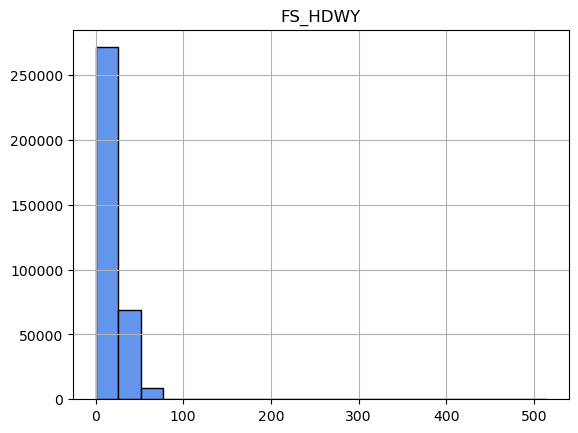

In [45]:
#Investigate the outliers >450 DOWNSTREAM_HDWY and > 380 FS_HEADWAY
#subdivide by route, perhaps?
#heatmap perhaps? 

fontsize = 16

plt.figure(figsize = (14,8))
df_t2.hist('FS_HDWY', bins=20, color = 'cornflowerblue', edgecolor = 'black');

In [46]:
df_hw.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.5,NaN,0.0,0.0,0.0,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.0,NaN,0.0,NaN,0.0,NaN


In [47]:
df_h = df_hw[(df_hw['ROUTE_ABBR'] == 52)]
df_route_52 = df_h[['CALENDAR_ID','TRIP_EDGE', 'ROUTE_DIRECTION_NAME', 'TRIP_ID','ROUTE_ABBR','LATITUDE', 'LONGITUDE', 'FIRST_STOP_HDWY', 'DOWNSTREAM_HDWY', 'FS_HDWY', 'DELTA_HDWY']]
df_route_52.loc[2910:2922]

,CALENDAR_ID,TRIP_EDGE,ROUTE_DIRECTION_NAME,TRIP_ID,ROUTE_ABBR,LATITUDE,LONGITUDE,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY
2910,120230801,1,TO DOWNTOWN,347116,52,36.048934,-86.713854,18.900000,0.000000,18.900000,0.000000
2911,120230801,0,TO DOWNTOWN,347116,52,36.082032,-86.726914,0.000000,5.900000,18.900000,0.312169
2912,120230801,0,TO DOWNTOWN,347116,52,36.112037,-86.745666,0.000000,6.083333,18.900000,0.321869
2913,120230801,0,TO DOWNTOWN,347116,52,36.135392,-86.759737,0.000000,6.183333,18.900000,0.327160
2914,120230801,2,TO DOWNTOWN,347116,52,36.167091,-86.781923,0.000000,NaN,18.900000,NaN
2915,120230801,1,FROM DOWNTOWN,347117,52,36.167091,-86.781923,12.733333,0.000000,12.733333,0.000000
2916,120230801,0,FROM DOWNTOWN,347117,52,36.135034,-86.759818,0.000000,11.500000,12.733333,0.903141
2917,120230801,0,FROM DOWNTOWN,347117,52,36.111844,-86.745821,0.000000,12.733333,12.733333,1.000000
2918,120230801,0,FROM DOWNTOWN,347117,52,36.082309,-86.727340,0.000000,10.850000,12.733333,0.852094
2919,120230801,2,FROM DOWNTOWN,347117,52,36.048934,-86.713854,0.000000,NaN,12.733333,NaN


#How to loop into stops, in a different column...
#This column has a flaw, as it doesn't end correctly.  See below.
##probably need to revisit a way to count the 3 columns and subset each 0 into a column.  
pat = [5, 6, 7, 8, 9]
df_route_52 = df_route_52.assign(new_column=[*islice(cycle(pat), len(df_route_52))])
df_route_52

In [48]:
#Q for Michael or the internet.  Why does this happen?
df_route_52.loc[9000:9010]

,CALENDAR_ID,TRIP_EDGE,ROUTE_DIRECTION_NAME,TRIP_ID,ROUTE_ABBR,LATITUDE,LONGITUDE,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY


In [54]:
#add first stop adherence
  #df_hw['FS_ADHERENCE'] = df_hw.groupby(['TRIP_ID','CALENDAR_ID'])['FIRST_STOP_HDWY'].transform(sum)
df_hw['FIRST_STOP_ADHERENCE'] = df_hw.apply(lambda row: row['ADHERENCE'] if row['TRIP_EDGE'] == 1 else 0, axis=1)
df_hw['FS_ADHERENCE'] = df_hw.groupby(['TRIP_ID','CALENDAR_ID'])['ADHERENCE'].transform(sum)
#add downstream adherence
df_hw['DOWNSTREAM_ADHERENCE'] = df_hw.apply(lambda row: row['ADHERENCE'] if row['TRIP_EDGE'] in (0, 2) else 0, axis=1)

#add first stop HDWY_DEV
df_hw['FIRST_STOP_HDWY_DEV'] = df_hw.apply(lambda row: row['HDWY_DEV'] if row['TRIP_EDGE'] == 1 else 0, axis=1)
df_hw['FS_HDWY'] = df_hw.groupby(['TRIP_ID','CALENDAR_ID'])['HDWY_DEV'].transform(sum)

#add DOWNSTREAM_HDWY_DEV
df_hw['DOWNSTREAM_HDWY_DEV'] = df_hw.apply(lambda row: row['HDWY_DEV'] if row['TRIP_EDGE'] in (0, 2) else 0, axis=1)


In [55]:
df_hw.loc[56:61]

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY,FS_ADHERENCE,DOWNSTREAM_ADHERENCE,DOWNSTREAM_HDWY_DEV,FIRST_STOP_ADHERENCE,FIRST_STOP_HDWY_DEV
56,120230801,1,99457946,2023-08-01,22,2200,2374,345121,0,TO DOWNTOWN,YGKG,7.0,1,36.203239,-86.840636,13:21:00,13:16:43,13:20:02,0.966666,50.0,46.050000,-3.950000,0,0,1,1,1.0,0,522,3.316666,-0.079000,46.050000,0.000000,-8.366667,0.000000,4.816665,0.000000,0.000000,0.966666,-3.950000
57,120230801,1,99457947,2023-08-01,22,2200,2374,345121,0,TO DOWNTOWN,CV23,5.0,0,36.182177,-86.814445,13:29:00,13:28:59,13:28:59,0.016666,12.0,7.583333,-4.416667,0,0,1,0,0.0,0,534,0.000000,-0.368056,0.000000,7.583333,-8.366667,0.164676,4.816665,0.016666,-4.416667,0.000000,0.000000
58,120230801,1,99457948,2023-08-01,22,2200,2374,345121,0,TO DOWNTOWN,MCC5_10,1.0,2,36.167091,-86.781923,13:45:00,13:41:10,13:41:10,3.833333,NaN,NaN,NaN,0,0,1,0,NaN,0,550,0.000000,NaN,0.000000,NaN,-8.366667,NaN,4.816665,3.833333,NaN,0.000000,0.000000
59,120230801,1,99457949,2023-08-01,22,2200,2374,345122,0,FROM DOWNTOWN,MCC5_10,1.0,1,36.167091,-86.781923,13:55:00,13:41:10,13:57:16,-2.266666,12.0,11.166666,-0.833334,0,0,1,0,0.0,0,551,16.100000,-0.069445,11.166666,0.000000,-1.416668,0.000000,-5.116666,0.000000,0.000000,-2.266666,-0.833334
60,120230801,1,99457950,2023-08-01,22,2200,2374,345122,0,FROM DOWNTOWN,CV23,5.0,0,36.183480,-86.814220,14:07:00,14:09:18,14:09:18,-2.300000,12.0,11.416666,-0.583334,0,0,1,0,0.0,0,566,0.000000,-0.048611,0.000000,11.416666,-1.416668,1.022388,-5.116666,-2.300000,-0.583334,0.000000,0.000000
61,120230801,1,99457951,2023-08-01,22,2200,2374,345122,0,FROM DOWNTOWN,MHSP,14.0,2,36.181248,-86.847705,14:17:00,14:17:33,14:17:33,-0.550000,NaN,NaN,NaN,0,0,1,0,NaN,0,577,0.000000,NaN,0.000000,NaN,-1.416668,NaN,-5.116666,-0.550000,NaN,0.000000,0.000000


In [56]:
# Create a deep copy of the sliced dataframe
df_hw_copy = df_hw.copy()
# Create a unique identifier combining TRIP_ID and CALENDAR_ID
df_hw_copy['TRIP_CALENDAR_ID'] = df_hw_copy['TRIP_ID'].astype(str) + "_" + df_hw_copy['CALENDAR_ID'].astype(str)

In [57]:
df_hw_copy = df_hw_copy[(df_hw_copy['FIRST_STOP_ADHERENCE'] > -390) & (df_hw_copy['DOWNSTREAM_ADHERENCE'] > -300 )]

In [58]:
df_hw.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY,FS_ADHERENCE,DOWNSTREAM_ADHERENCE,DOWNSTREAM_HDWY_DEV,FIRST_STOP_ADHERENCE,FIRST_STOP_HDWY_DEV
count,3.503280e+05,350328.000000,3.503280e+05,350328.000000,350328.000000,350328.000000,350328.000000,350328.000000,350317.000000,350328.000000,350328.000000,350328.000000,338860.000000,274737.000000,266061.000000,265892.000000,350328.000000,350328.000000,350328.000000,350328.000000,279999.000000,350328.000000,350328.000000,338857.000000,2.658890e+05,350328.000000,269341.000000,350328.000000,2.660850e+05,350328.000000,340564.000000,269232.000000,348624.000000,346988.000000
mean,1.202309e+08,1.298466,1.001038e+08,38.348080,3846.953289,1951.131054,351609.796870,0.006631,7.351302,0.579089,36.158433,-86.769952,-3.188795,18.186040,18.648567,0.518068,0.027902,0.168522,0.770840,0.015263,0.015193,0.011955,325.173280,2.963914,inf,3.794508,13.486005,2.219408,inf,-18.189708,-2.640198,0.398417,-0.520327,0.087852
std,5.063420e+01,0.633101,3.227507e+05,20.338352,2042.238399,769.828707,1490.949373,0.097167,4.032993,0.793978,0.059113,0.065548,6.898852,12.261828,14.330594,7.161809,0.164694,0.374330,0.420293,0.122597,0.122320,0.108681,235.335703,7.402945,NaN,10.636819,14.093876,23.230430,NaN,31.491533,5.920981,6.432273,3.849297,2.697417
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-948.533333,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-208.033333,-1.000000e+00,0.000000,0.000000,-161.500002,0.000000e+00,-960.666663,-489.316666,-55.533334,-948.533333,-64.000000
25%,1.202308e+08,1.000000,9.989140e+07,22.000000,2211.000000,1391.000000,350900.000000,0.000000,4.000000,0.000000,36.127172,-86.812719,-4.566666,10.000000,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,134.000000,0.000000,-1.416667e-01,0.000000,0.000000,-7.700001,6.818182e-02,-24.433332,-4.000000,-1.533334,0.000000,0.000000
50%,1.202308e+08,1.000000,1.001346e+08,50.000000,5006.000000,2012.000000,352001.000000,0.000000,6.000000,0.000000,36.153870,-86.774535,-2.000000,15.000000,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,292.000000,0.000000,1.886792e-03,0.000000,12.366666,0.000000,8.744222e-01,-10.299999,-1.050000,0.000000,0.000000,0.000000
75%,1.202309e+08,1.000000,1.003481e+08,55.000000,5505.000000,2585.000000,352669.000000,0.000000,10.000000,1.000000,36.179753,-86.726914,-0.333333,20.000000,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,465.000000,1.950000,1.552083e-01,0.000000,19.950000,9.116666,1.077892e+00,-1.800000,0.000000,1.666666,0.000000,0.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,36.307973,-86.636496,88.383333,503.000000,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1309.000000,956.500000,inf,514.366666,590.433333,567.133332,inf,258.716665,88.383333,565.433333,84.666666,472.366666


In [ ]:
#Take approx 3% of the ultra far outliers out of the data yields a roughly linear trend for adherence vs. 
#downstream adherence

In [59]:
df_hw_copy.describe()

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY,FS_ADHERENCE,DOWNSTREAM_ADHERENCE,DOWNSTREAM_HDWY_DEV,FIRST_STOP_ADHERENCE,FIRST_STOP_HDWY_DEV
count,3.388480e+05,338848.000000,3.388480e+05,338848.000000,338848.000000,338848.000000,338848.000000,338848.000000,338843.000000,338848.000000,338848.000000,338848.000000,338848.000000,266104.000000,266054.000000,265885.000000,338848.000000,338848.000000,338848.000000,338848.000000,271155.000000,338848.000000,338848.000000,338845.000000,2.658820e+05,338848.000000,267630.000000,338848.000000,2.660450e+05,338848.000000,338848.000000,267521.000000,338848.000000,337212.000000
mean,1.202309e+08,1.296918,1.001037e+08,38.484571,3860.106617,1945.957409,351612.515662,0.004146,7.372842,0.579162,36.158529,-86.770136,-3.170185,18.116357,18.648363,0.517882,0.028848,0.174196,0.796956,0.008464,0.013535,0.011964,324.788858,2.951650,inf,3.922519,13.572223,2.234572,inf,-18.220700,-2.647214,0.400965,-0.522972,0.090242
std,5.063107e+01,0.630769,3.229919e+05,20.323167,2040.442944,770.628246,1494.442551,0.076116,4.042884,0.793091,0.059110,0.065626,6.077782,12.130865,14.330441,7.161277,0.167379,0.379279,0.402265,0.091610,0.115549,0.108724,234.330267,6.870049,NaN,10.791395,14.097414,23.290689,NaN,30.424814,5.694701,6.452731,2.697898,2.734880
min,1.202308e+08,1.000000,9.945789e+07,3.000000,300.000000,0.000000,345104.000000,0.000000,1.000000,0.000000,36.048934,-86.955657,-375.233333,0.000000,0.000000,-64.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-208.033333,-1.000000e+00,0.000000,0.000000,-161.500002,0.000000e+00,-960.666663,-295.466666,-55.533334,-375.233333,-64.000000
25%,1.202308e+08,1.000000,9.989105e+07,22.000000,2211.000000,1379.000000,350904.000000,0.000000,4.000000,0.000000,36.127172,-86.812719,-4.566666,10.000000,11.000000,-2.316667,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,136.000000,0.000000,-1.416667e-01,0.000000,0.300000,-7.900002,6.939279e-02,-24.683332,-4.016666,-1.550000,0.000000,0.000000
50%,1.202308e+08,1.000000,1.001344e+08,50.000000,5006.000000,2001.000000,352002.000000,0.000000,6.000000,0.000000,36.153870,-86.780490,-2.000000,15.000000,16.183333,0.033333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,292.000000,0.000000,1.869318e-03,0.000000,12.450000,0.099998,8.745031e-01,-10.599999,-1.066666,0.000000,0.000000,0.000000
75%,1.202309e+08,1.000000,1.003480e+08,55.000000,5506.000000,2584.000000,352671.250000,0.000000,10.000000,1.000000,36.179753,-86.726914,-0.333333,20.000000,23.250000,2.483333,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,464.000000,1.950000,1.551282e-01,0.000000,20.016666,9.349999,1.077944e+00,-2.116667,0.000000,1.700000,0.000000,0.000000
max,1.202309e+08,3.000000,1.007029e+08,56.000000,9975.000000,3173.000000,354106.000000,4.000000,17.000000,2.000000,36.307973,-86.636496,88.383333,503.000000,590.433333,565.433333,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1309.000000,388.933333,inf,514.366666,590.433333,567.133332,inf,258.716665,88.383333,565.433333,84.666666,472.366666


In [80]:
df_hw_copy['FS_MEAN_ADHERENCE'] = df_hw_copy[df_hw_copy['TRIP_EDGE'] == 1].groupby('TRIP_CALENDAR_ID')['ADHERENCE'].mean()
df_hw_copy['DOWNSTREAM_MEAN_ADHERENCE'] = df_hw_copy[df_hw_copy['TRIP_EDGE'] != 1].groupby('TRIP_CALENDAR_ID')['ADHERENCE'].mean()
df_hw.head(2)

,CALENDAR_ID,SERVICE_ABBR,ADHERENCE_ID,DATE,ROUTE_ABBR,BLOCK_ABBR,OPERATOR,TRIP_ID,OVERLOAD_ID,ROUTE_DIRECTION_NAME,TIME_POINT_ABBR,ROUTE_STOP_SEQUENCE,TRIP_EDGE,LATITUDE,LONGITUDE,SCHEDULED_TIME,ACTUAL_ARRIVAL_TIME,ACTUAL_DEPARTURE_TIME,ADHERENCE,SCHEDULED_HDWY,ACTUAL_HDWY,HDWY_DEV,ADJUSTED_EARLY_COUNT,ADJUSTED_LATE_COUNT,ADJUSTED_ONTIME_COUNT,STOP_CANCELLED,PREV_SCHED_STOP_CANCELLED,IS_RELIEF,BLOCK_STOP_ORDER,DWELL_IN_MINS,PERC_HDWY,FIRST_STOP_HDWY,DOWNSTREAM_HDWY,FS_HDWY,DELTA_HDWY,FS_ADHERENCE,DOWNSTREAM_ADHERENCE,DOWNSTREAM_HDWY_DEV,FIRST_STOP_ADHERENCE,FIRST_STOP_HDWY_DEV
0,120230801,1,99457890,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,MHSP,14.0,1,36.181248,-86.847705,04:42:00,04:37:38,04:44:08,-2.133333,NaN,NaN,NaN,0,0,1,0,0.0,0,2,6.5,NaN,0.0,0.0,0.0,NaN,0.766667,0.00,0.0,-2.133333,NaN
1,120230801,1,99457891,2023-08-01,22,2200,1040,345104,0,TO DOWNTOWN,ELIZ,10.0,0,36.193454,-86.839981,04:46:00,04:48:27,04:48:27,-2.450000,NaN,NaN,NaN,0,0,1,0,0.0,0,9,0.0,NaN,0.0,NaN,0.0,NaN,0.766667,-2.45,NaN,0.000000,0.0


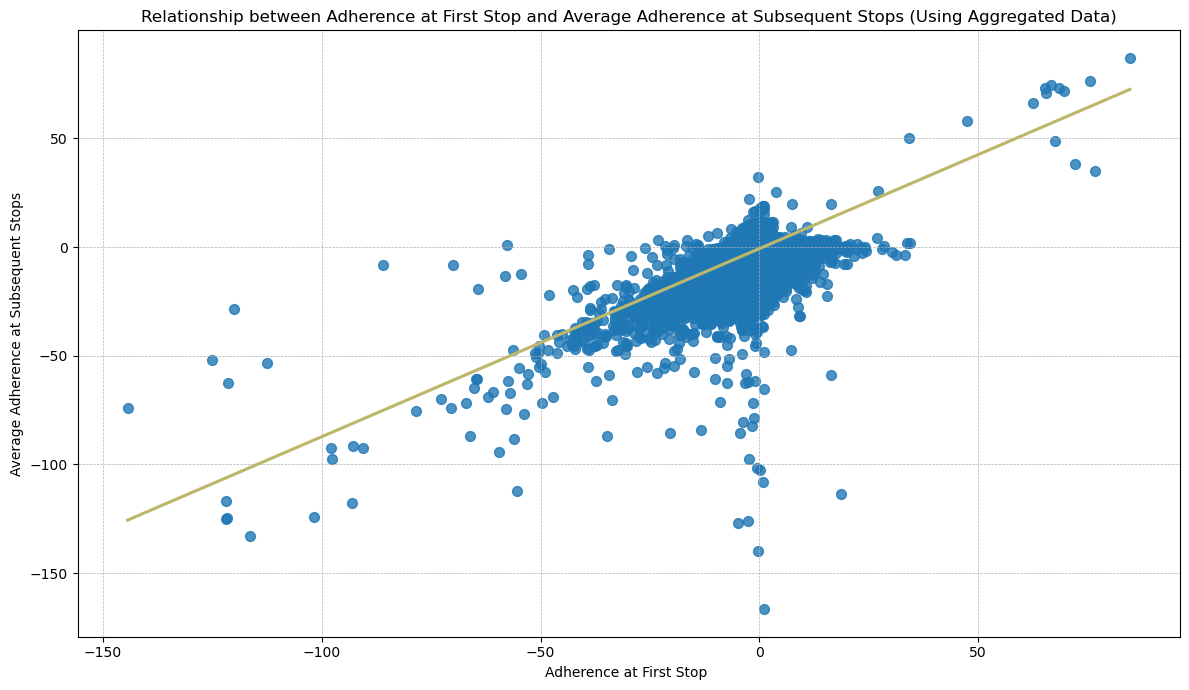

In [73]:
#Aggregate adherence values for the first stop and average adherence for subsequent stops based on the unique identifier
first_stop_adherence_agg = df_hw_copy[df_hw_copy['TRIP_EDGE'] == 1].groupby('TRIP_CALENDAR_ID')['ADHERENCE'].mean()
avg_subsequent_adherence_agg = df_hw_copy[df_hw_copy['TRIP_EDGE'] != 1].groupby('TRIP_CALENDAR_ID')['ADHERENCE'].mean()

#Synchronize the two aggregated series by their unique identifiers
agg_adherence_data = pd.concat([first_stop_adherence_agg, avg_subsequent_adherence_agg], axis=1, keys=['First_Stop_Adherence', 'Avg_Subsequent_Adherence']).dropna()

#Create the scatter plot using the aggregated data
plt.figure(figsize=(12, 7))
sns.regplot(x=agg_adherence_data['First_Stop_Adherence'], y=agg_adherence_data['Avg_Subsequent_Adherence'], scatter_kws={'s':50}, line_kws={'color':'darkkhaki'}, ci=None)
plt.xlabel('Adherence at First Stop ')
plt.ylabel('Average Adherence at Subsequent Stops')
plt.title('Relationship between Adherence at First Stop and Average Adherence at Subsequent Stops (Using Aggregated Data)')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.tight_layout()
plt.show()


In [61]:
lm2 = smf.ols('Avg_Subsequent_Adherence ~ First_Stop_Adherence', data = agg_adherence_data).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                               
====================================================================================
Dep. Variable:     Avg_Subsequent_Adherence   R-squared:                       0.400
Model:                                  OLS   Adj. R-squared:                  0.400
Method:                       Least Squares   F-statistic:                 4.362e+04
Date:                      Wed, 01 Nov 2023   Prob (F-statistic):               0.00
Time:                              20:31:19   Log-Likelihood:            -1.9082e+05
No. Observations:                     65510   AIC:                         3.816e+05
Df Residuals:                         65508   BIC:                         3.817e+05
Df Model:                                 1                                         
Covariance Type:                  nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               -0.7200      0.021    -35.032      0.000      -0.760      -0.680
First_Stop_Adherence     0.8652      0.004    208.845      0.000       0.857       0.873
==============================================================================
Omnibus:                    74599.547   Durbin-Watson:                   1.447
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         36388304.861
Skew:                          -5.342   Prob(JB):                         0.00
Kurtosis:                     117.965   Cond. No.                         5.93
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
import time
t = 1000 * time.time() # current time in milliseconds
np.random.seed(int(t) % 2**32)

def check_acc():

    t = 1000 * time.time() # current time in milliseconds
    np.random.seed(int(t) % 2**32)

    # Define the proportion of data to use for the test set (e.g., 80% train, 20% test)
    test_size = 0.1

    # Generate a boolean mask for selecting rows for the test set
    test_mask = np.random.rand(len(agg_adherence_data)) < test_size

    # Split the data into training and test sets
    train_data = agg_adherence_data[~test_mask]
    test_data = agg_adherence_data[test_mask]

    # reset the index of the new DataFrames
    train_data = train_data.reset_index(drop=True)
    test_data = test_data.reset_index(drop=True)
    model = smf.glm('Avg_Subsequent_Adherence ~ First_Stop_Adherence', data = train_data).fit()
    preds = (model.predict(test_data) > 0.5).astype(int)
    return (test_data['Avg_Subsequent_Adherence'] == preds).sum()/len(test_data['Avg_Subsequent_Adherence'])

In [71]:
accuracies = []
for i in range(100):
    accuracies.append(check_acc())

In [72]:
print(min(accuracies))
print(max(accuracies))
print(sum(accuracies)/len(accuracies))

0.0
0.0012059089538739825
0.0004117869416992803


In [81]:
#HOW COME THIS DOESN"T WORK???

# set seaborn style
sns.set_style("white")
 
# Custom the color, add shade and bandwidth
sns.kdeplot(data='df_hw_copy', x='FS_MEAN_ADHERENCE', y='DOWNSTREAM_MEAN_ADHERENCE', cmap="Reds", fill=True, bw_adjust=.5)
plt.show()

ValueError: Could not interpret value `FS_MEAN_ADHERENCE` for parameter `x`